# **Convert Velodyne-data to Panoramic Image** 
***

## Dataset
[KITTI 2011_09_26_drive_0005 dataset](http://www.cvlibs.net/datasets/kitti/raw_data.php?type=city)


## Objective

Convert Velodyne data(model : HDL-64E) to panoramic image.
In this code, Every setting value related HW is set for [HDL-64E](http://velodynelidar.com/docs/datasheet/63-9194%20Rev-E_HDL-64E_S3_Spec%20Sheet_Web.pdf).(e.g. Angular Resolution, FOV, etc)
Therefore, if you are using different 3D-Lidar model, you need to replace them by the corresponding values.  
  
  

| Channe|     FOV(V)       |   Angular Resolution(V)  |  FOV(H)  |Angular Resolution(H)       |
|:-----:|:----------------:|:------------------------:|:--------:|:--------------------------:| 
|  64   | +2˚ to  - 24.9˚|  0.4˚                   |  360˚   | 0.08˚- 0.35˚(5Hz - 20Hz) |

The rotation rate is assumed as 20Hz. SO, the horizontal angular resolution is set to 0.35˚.  
  
  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from kitti_foundation import Kitti, Kitti_util
%matplotlib inline

velo_path = './velodyne_points/data'

velo = Kitti_util(frame=0, velo_path=velo_path)
frame = velo.velo_file

print(frame.shape)

(123397, 3)


Points from a Velodyne scan can be roughly projected and discretized into a 2D point map.  
  
The related projection function is refered to **[this paper](http://www.roboticsproceedings.org/rss12/p42.pdf)**.(Vehicle Detection from 3D Lidar Using Fully Convolutional Network(2016))

(-0.5, 1029.5, 65.5, -0.5)

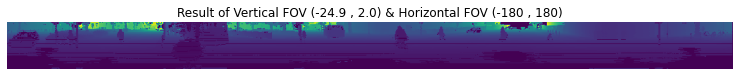

In [6]:
h_fov, v_fov = (-180, 180), (-24.9, 2.0)
pano_img = velo.velo_2_pano_frame(h_fov, v_fov, depth=False)

# display result image
plt.subplots(1,1, figsize = (13,3) )
plt.title("Result of Vertical FOV ({} , {}) & Horizontal FOV ({} , {})".format(v_fov[0],v_fov[1],h_fov[0],h_fov[1]))
plt.imshow(pano_img)
plt.axis('off')

#print(pano_img.shape)

(-0.5, 400.5, 30.5, -0.5)

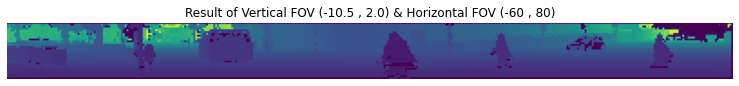

In [7]:
""" different vertical, horizontal FOV's result """
h_fov, v_fov = (-60, 80), (-10.5,2.0)

pano_img = velo.velo_2_pano_frame(h_fov, v_fov, depth=False)

# display result image
plt.subplots(1,1, figsize = (13,3) )
plt.title("Result of Vertical FOV ({} , {}) & Horizontal FOV ({} , {})".format(v_fov[0],v_fov[1],h_fov[0],h_fov[1]))
plt.imshow(pano_img)
plt.axis('off')

#print(pano_img.shape)

## Save panorama video

In [8]:
import cv2

v_fov, h_fov = (-24.9, 2.0), (-180, 180)

velo2 = Kitti_util(frame='all',velo_path=velo_path)
pano = velo2.velo_2_pano(h_fov, v_fov, depth=True)

""" save panorama video """
fourcc = cv2.VideoWriter_fourcc(*'XVID')
vid = cv2.VideoWriter('pano.avi', fourcc, 25.0, (1030, 66), False)

for frame in pano:
    vid.write(frame)

#print('video saved')
vid.release()

## Display panorama video

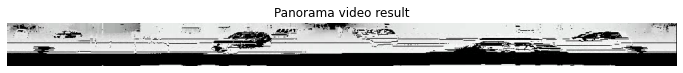

In [9]:
# this is result of depth mode = True

from IPython.display import clear_output

""" display video """
vid = cv2.VideoCapture("./pano.avi")

while(True):
    ret, frame = vid.read()
    if not ret:
        vid.release()
        break
    fig = plt.figure(figsize=(12,3))
    
    plt.title("Panorama video result")
    plt.axis('off')
    plt.imshow(frame)
    plt.show()
    # clear current frame for next frame
    clear_output(wait=True)

#vid.release()